# 1. Read and preprocessing data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler as Scaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.metrics import silhouette_score
plt.style.use('fivethirtyeight')

In [2]:
data = pd.read_csv('Credit Card.csv')
df= data.drop('CUST_ID', axis=1)
print(data.shape)
data.head(10)

(8950, 18)


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
6,C10007,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12
7,C10008,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12
8,C10009,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12
9,C10010,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12


<AxesSubplot:>

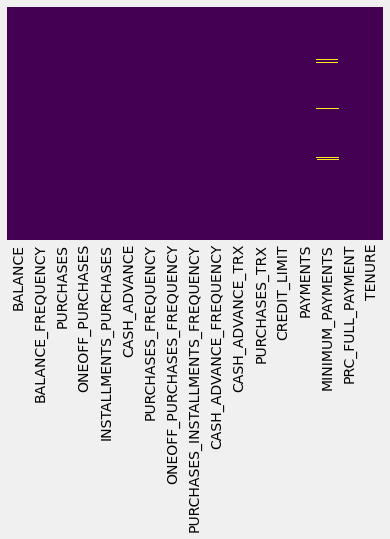

In [3]:
# check giá trị null trong data
missing_data = df.isnull()
sns.heatmap(missing_data, cbar=False, yticklabels=False, cmap='viridis')

In [4]:
missing_data = df.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")    

BALANCE
False    8950
Name: BALANCE, dtype: int64

BALANCE_FREQUENCY
False    8950
Name: BALANCE_FREQUENCY, dtype: int64

PURCHASES
False    8950
Name: PURCHASES, dtype: int64

ONEOFF_PURCHASES
False    8950
Name: ONEOFF_PURCHASES, dtype: int64

INSTALLMENTS_PURCHASES
False    8950
Name: INSTALLMENTS_PURCHASES, dtype: int64

CASH_ADVANCE
False    8950
Name: CASH_ADVANCE, dtype: int64

PURCHASES_FREQUENCY
False    8950
Name: PURCHASES_FREQUENCY, dtype: int64

ONEOFF_PURCHASES_FREQUENCY
False    8950
Name: ONEOFF_PURCHASES_FREQUENCY, dtype: int64

PURCHASES_INSTALLMENTS_FREQUENCY
False    8950
Name: PURCHASES_INSTALLMENTS_FREQUENCY, dtype: int64

CASH_ADVANCE_FREQUENCY
False    8950
Name: CASH_ADVANCE_FREQUENCY, dtype: int64

CASH_ADVANCE_TRX
False    8950
Name: CASH_ADVANCE_TRX, dtype: int64

PURCHASES_TRX
False    8950
Name: PURCHASES_TRX, dtype: int64

CREDIT_LIMIT
False    8949
True        1
Name: CREDIT_LIMIT, dtype: int64

PAYMENTS
False    8950
Name: PAYMENTS, dtype: int64

MINIMU

In [5]:
# đi kiếm dòng có giá trị null ở column 'CREDIT_LIMIT'
df[df['CREDIT_LIMIT'].isnull()].index.tolist()

[5203]

In [6]:
# do ID này có số dư tài khoản bằng 18.400472 nên giá trị null ở CREDIT_LIMIT không thể thay thế bằng 0 được.
# vì vậy CREDIT_LIMIT lẫn MINIMUM_PAYMENTS cần được điền giá trị khác 0. Trường hợp này nên dùng kỹ thuật median để tránh
# data có giá trị outlier ngoài mong muốn.
df.at[5203,'BALANCE']

18.400472

In [7]:
df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].median(),inplace=True)
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median(),inplace=True)
df.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

Từ data này ta có thể thêm 4 cột mới với giá trị như sau:
1. Hàng tháng mua bao nhiêu (theo kỳ hạn TENURE) - Monthly_purchase =PURCHASES / TENURE
2. Tiền ứng hàng tháng (theo kỳ hạn TENURE) - Monthly_cash_advance =CASH_ADVANCE / TENURE
3. Tỷ lệ hạn mức còn lại được sử dụng - limit_usage = BALANCE / CREDIT_LIMIT
4. Tỷ lệ thanh toán so với thanh toán tối thiểu - pay_minpay / PAYMENTS / MINIMUM_PAYMENTS

In [8]:
df['Monthly_purchase']=df['PURCHASES']/df['TENURE']
df['Monthly_cash_advance']=df['CASH_ADVANCE']/df['TENURE']
df['limit_usage']=df.apply(lambda x: x['BALANCE']/x['CREDIT_LIMIT'], axis=1)
df['pay_minpay']=df.apply(lambda x:x['PAYMENTS']/x['MINIMUM_PAYMENTS'],axis=1)

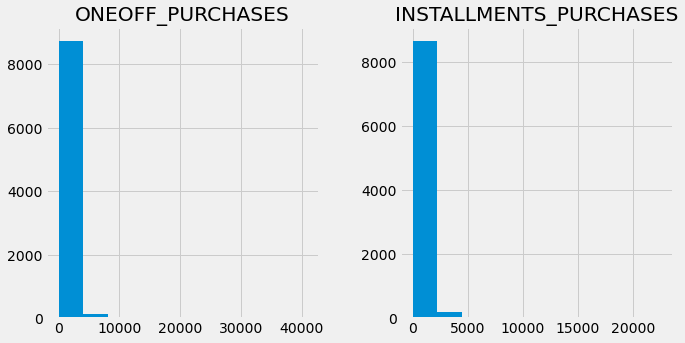

In [9]:
df[['ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES']].hist(bins = 10, figsize=(10,5))
plt.show()

In [10]:
df.loc[:,['ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES']].tail(10)

,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES
8940,0.00,591.24
8941,0.00,214.55
8942,0.00,113.28
8943,20.90,0.00
8944,1012.73,0.00
8945,0.00,291.12
8946,0.00,300.00
8947,0.00,144.40
8948,0.00,0.00
8949,1093.25,0.00


Từ đồ thị histogram và table trên, ta có được ma trận như sau:
1.ID chỉ mua 1 lần.
2.ID mua trả góp.
3.ID có cả 2.
4.ID không mua 1 lần cũng ko mua trả góp.

In [11]:
print(df[(df['ONEOFF_PURCHASES']==0) & (df['INSTALLMENTS_PURCHASES']==0)].shape)
print(df[(df['ONEOFF_PURCHASES']>0) & (df['INSTALLMENTS_PURCHASES']>0)].shape)
print(df[(df['ONEOFF_PURCHASES']>0) & (df['INSTALLMENTS_PURCHASES']==0)].shape)
print(df[(df['ONEOFF_PURCHASES']==0) & (df['INSTALLMENTS_PURCHASES']>0)].shape)

(2042, 21)
(2774, 21)
(1874, 21)
(2260, 21)


In [12]:
def purchase(df):   
    if (df['ONEOFF_PURCHASES']==0) & (df['INSTALLMENTS_PURCHASES']==0):
        return 'none'
    if (df['ONEOFF_PURCHASES']>0) & (df['INSTALLMENTS_PURCHASES']>0):
         return 'both_oneoff_installment'
    if (df['ONEOFF_PURCHASES']>0) & (df['INSTALLMENTS_PURCHASES']==0):
        return 'one_off'
    if (df['ONEOFF_PURCHASES']==0) & (df['INSTALLMENTS_PURCHASES']>0):
        return 'istallment'

In [13]:
df['purchase_kind']=df.apply(purchase,axis=1)
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Monthly_purchase,Monthly_cash_advance,limit_usage,pay_minpay,purchase_kind
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,...,1000.0,201.802084,139.509787,0.000000,12,7.950000,0.000000,0.040901,1.446508,istallment
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,...,7000.0,4103.032597,1072.340217,0.222222,12,0.000000,536.912124,0.457495,3.826241,none
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,...,7500.0,622.066742,627.284787,0.000000,12,64.430833,0.000000,0.332687,0.991682,one_off
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,...,7500.0,0.000000,312.343947,0.000000,12,124.916667,17.149001,0.222223,0.000000,one_off
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,...,1200.0,678.334763,244.791237,0.000000,12,1.333333,0.000000,0.681429,2.771075,one_off


In [14]:
# do data có sự khác biệt giữa giá trị là rất lớn, vì vậy cần đưa data về dạng log.
df_log=df.drop(['purchase_kind'],axis=1).applymap(lambda x: np.log(x+1))
df_log.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Monthly_purchase,Monthly_cash_advance,limit_usage,pay_minpay
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,...,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,6.161637,0.619940,4.899647,3.204274,3.352403,3.319086,0.361268,0.158699,0.270072,0.113512,...,1.894731,8.094825,6.624540,5.916079,0.117730,2.519680,3.050877,2.163970,0.296081,1.357600
std,2.013303,0.148590,2.916872,3.246365,3.082973,3.566298,0.277317,0.216672,0.281852,0.156716,...,1.373856,0.819629,1.591763,1.169929,0.211617,0.130367,2.002823,2.429741,0.250303,0.940149
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,3.931826,0.000000,0.018982,0.000000,1.945910,0.000000,0.000000,0.000000,0.000000
25%,4.861995,0.635989,3.704627,0.000000,0.000000,0.000000,0.080042,0.000000,0.000000,0.000000,...,0.693147,7.378384,5.951361,5.146667,0.000000,2.564949,1.481458,0.000000,0.040656,0.648817
50%,6.773521,0.693147,5.892417,3.663562,4.499810,0.000000,0.405465,0.080042,0.154151,0.000000,...,2.079442,8.006701,6.754489,5.747301,0.000000,2.564949,3.494587,0.000000,0.264455,1.109459
75%,7.628099,0.693147,7.013133,6.360274,6.151961,7.016449,0.650588,0.262364,0.559616,0.200671,...,2.890372,8.779711,7.550732,6.671670,0.133531,2.564949,4.587295,4.606022,0.540911,1.953415
max,9.854515,0.693147,10.800403,10.615512,10.021315,10.760839,0.693147,0.693147,0.693147,0.916291,...,5.883322,10.308986,10.834125,11.243832,0.693147,2.564949,8.315721,8.276166,2.827902,8.830767


Để có thể đưa vào model training thì cần đưa chuỗi ký tự cửa 'purchase_kind' thành các giá trị số.
Các column không cần đưa vào model gồm:
- 'BALANCE','PURCHASES','CASH_ADVANCE','TENURE','PAYMENTS','MINIMUM_PAYMENTS','PRC_FULL_PAYMENT','CREDIT_LIMIT'

In [15]:
col=['BALANCE','PURCHASES','CASH_ADVANCE','TENURE','PAYMENTS','MINIMUM_PAYMENTS','PRC_FULL_PAYMENT','CREDIT_LIMIT']
df_log=df_log[[x for x in df_log.columns if x not in col ]]
df_log.head()

,BALANCE_FREQUENCY,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,Monthly_purchase,Monthly_cash_advance,limit_usage,pay_minpay
0,0.597837,0.000000,4.568506,0.154151,0.000000,0.080042,0.000000,0.000000,1.098612,2.191654,0.000000,0.040086,0.894662
1,0.646627,0.000000,0.000000,0.000000,0.000000,0.000000,0.223144,1.609438,0.000000,0.000000,6.287695,0.376719,1.574068
2,0.693147,6.651791,0.000000,0.693147,0.693147,0.000000,0.000000,0.000000,2.564949,4.180994,0.000000,0.287197,0.688979
3,0.492477,7.313220,0.000000,0.080042,0.080042,0.000000,0.080042,0.693147,0.693147,4.835620,2.898616,0.200671,0.000000
4,0.693147,2.833213,0.000000,0.080042,0.080042,0.000000,0.000000,0.000000,0.693147,0.847298,0.000000,0.519644,1.327360


In [16]:
# đưa các giá trị trong purchase_kind về thành các biến có giá trị rời rạc
df_log['purchase_kind']=df.loc[:,'purchase_kind']
df_dummy=pd.concat([df_log,pd.get_dummies(df_log['purchase_kind'])],axis=1)
df_dummy.head()

,BALANCE_FREQUENCY,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,Monthly_purchase,Monthly_cash_advance,limit_usage,pay_minpay,purchase_kind,both_oneoff_installment,istallment,none,one_off
0,0.597837,0.000000,4.568506,0.154151,0.000000,0.080042,0.000000,0.000000,1.098612,2.191654,0.000000,0.040086,0.894662,istallment,0,1,0,0
1,0.646627,0.000000,0.000000,0.000000,0.000000,0.000000,0.223144,1.609438,0.000000,0.000000,6.287695,0.376719,1.574068,none,0,0,1,0
2,0.693147,6.651791,0.000000,0.693147,0.693147,0.000000,0.000000,0.000000,2.564949,4.180994,0.000000,0.287197,0.688979,one_off,0,0,0,1
3,0.492477,7.313220,0.000000,0.080042,0.080042,0.000000,0.080042,0.693147,0.693147,4.835620,2.898616,0.200671,0.000000,one_off,0,0,0,1
4,0.693147,2.833213,0.000000,0.080042,0.080042,0.000000,0.000000,0.000000,0.693147,0.847298,0.000000,0.519644,1.327360,one_off,0,0,0,1


In [17]:
# sau khi đưa các giá trị trong purchase_kind về thành các biến có giá trị rời rạc thì cột purchase_kind ko cần dùng nữa
df_dummy=df_dummy.drop(['purchase_kind'],axis=1)
df_dummy.isnull().sum()

BALANCE_FREQUENCY                   0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
Monthly_purchase                    0
Monthly_cash_advance                0
limit_usage                         0
pay_minpay                          0
both_oneoff_installment             0
istallment                          0
none                                0
one_off                             0
dtype: int64

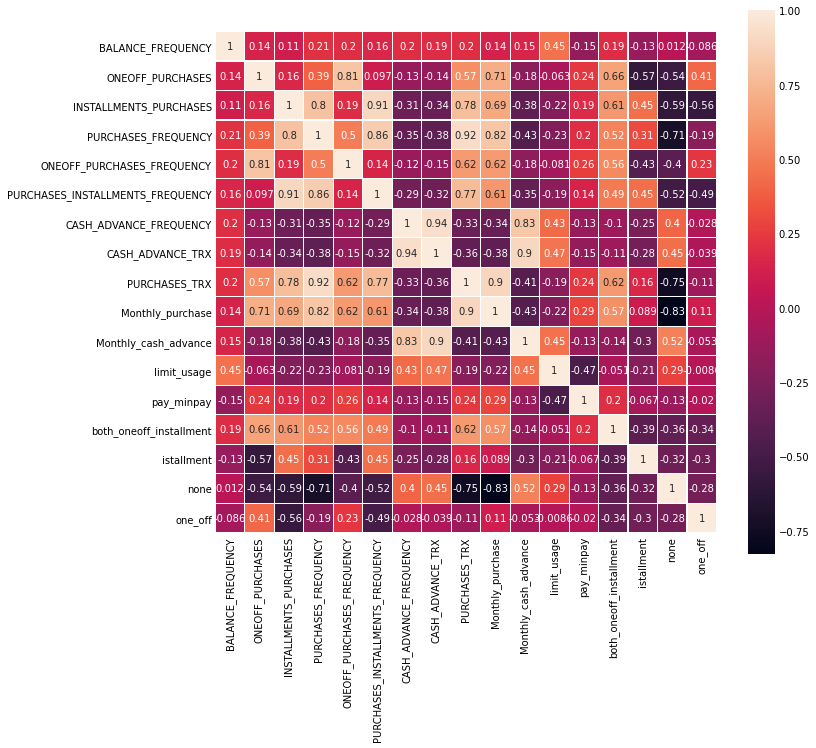

In [18]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(df_dummy.corr(), linewidths=0.1, square=True, annot=True)

In [19]:
num_cols = ['BALANCE_FREQUENCY', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'Monthly_purchase',
       'Monthly_cash_advance', 'limit_usage', 'pay_minpay',
       'both_oneoff_installment', 'istallment', 'none', 'one_off']
X = df_dummy[num_cols]

In [20]:
# normalize data 
#from sklearn.preprocessing import MinMaxScaler as Scaler

for i in num_cols:
    # fit on training data column
    scale = Scaler().fit(X[[i]])
    
    X[i] = scale.transform(X[[i]])
  
X.head()

,BALANCE_FREQUENCY,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,Monthly_purchase,Monthly_cash_advance,limit_usage,pay_minpay,both_oneoff_installment,istallment,none,one_off
0,-0.148757,-0.987090,0.394480,-0.746901,-0.732480,-0.674253,-0.724360,-0.810069,-0.579510,-0.429030,-0.890667,-1.022796,-0.492437,-0.670193,1.720516,-0.543690,-0.514625
1,0.179616,-0.987090,-1.087454,-1.302799,-0.732480,-0.958256,0.699592,0.784603,-1.379210,-1.523373,1.697282,0.322182,0.230261,-0.670193,-0.581221,1.839282,-0.514625
2,0.492710,1.062022,-1.087454,1.196820,2.466762,-0.958256,-0.724360,-0.810069,0.487865,0.564294,-0.890667,-0.035495,-0.711225,-0.670193,-0.581221,-0.543690,1.943162
3,-0.857867,1.265778,-1.087454,-1.014151,-0.363042,-0.958256,-0.213583,-0.123281,-0.874655,0.891164,0.302372,-0.381199,-1.444107,-0.670193,-0.581221,-0.543690,1.943162
4,0.492710,-0.114307,-1.087454,-1.014151,-0.363042,-0.958256,-0.724360,-0.810069,-0.874655,-1.100298,-0.890667,0.893219,-0.032167,-0.670193,-0.581221,-0.543690,1.943162


In [21]:
# sử dụng PCA model
pca = PCA(svd_solver='randomized', random_state=42)
pca.fit(X)

PCA(random_state=42, svd_solver='randomized')

In [22]:
pca.components_

array([[ 2.97070974e-02,  2.14107206e-01,  3.12050629e-01,
         3.45823234e-01,  2.14701949e-01,  2.95450810e-01,
        -2.14335829e-01, -2.29393485e-01,  3.55503414e-01,
         3.45992143e-01, -2.43861174e-01, -1.46301905e-01,
         1.19631616e-01,  2.41392147e-01,  8.22090779e-02,
        -3.10282785e-01, -4.21375183e-02],
       [ 2.40072217e-01,  4.06078184e-01, -9.84036594e-02,
         1.58134096e-02,  3.62207806e-01, -1.12002477e-01,
         2.86073833e-01,  2.91555606e-01,  1.06624771e-01,
         1.41635391e-01,  2.64317622e-01,  2.35709775e-01,
         2.13280163e-02,  2.73675977e-01, -4.43375470e-01,
        -5.21353912e-03,  1.67737275e-01],
       [-2.63139562e-01,  2.39165449e-01, -3.15625277e-01,
        -1.62843340e-01,  1.63222341e-01, -3.30029351e-01,
        -2.78585530e-01, -2.85089324e-01, -1.02742788e-01,
         2.39861305e-02, -2.57427211e-01, -2.51278131e-01,
         1.36356889e-01, -1.31934764e-01, -2.08683305e-01,
        -9.69113841e-02,  4.7

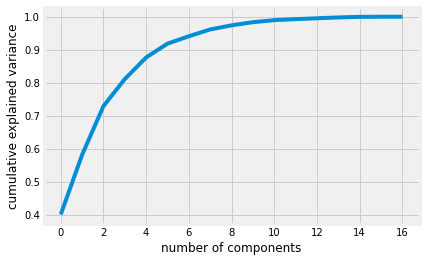

In [23]:
%matplotlib inline
fig = plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [24]:
np.cumsum(pca.explained_variance_ratio_)

array([0.40205787, 0.58264398, 0.72993793, 0.81154428, 0.87705558,
       0.91864924, 0.94109253, 0.96161141, 0.97397871, 0.98358966,
       0.98972481, 0.992755  , 0.99539076, 0.99796169, 0.99963605,
       1.        , 1.        ])

In [25]:
# nhìn từ line chart trên, ta có thể thế số lượng component từ 5 trở đi có độ dốc không nhiều, do đó chọn component=5
pca_df = pd.DataFrame({ 'Variable':num_cols,'PC1':pca.components_[0],
                        'PC2':pca.components_[1],'PC3':pca.components_[2],
                        'PC4':pca.components_[3],'PC5':pca.components_[4]})
pca_df

,Variable,PC1,PC2,PC3,PC4,PC5
0,BALANCE_FREQUENCY,0.029707,0.240072,-0.263140,-0.353549,-0.228681
1,ONEOFF_PURCHASES,0.214107,0.406078,0.239165,0.001520,-0.023197
2,INSTALLMENTS_PURCHASES,0.312051,-0.098404,-0.315625,0.087983,-0.002181
3,PURCHASES_FREQUENCY,0.345823,0.015813,-0.162843,-0.074617,0.115948
4,ONEOFF_PURCHASES_FREQUENCY,0.214702,0.362208,0.163222,0.036303,-0.051279
5,PURCHASES_INSTALLMENTS_FREQUENCY,0.295451,-0.112002,-0.330029,0.023502,0.025871
6,CASH_ADVANCE_FREQUENCY,-0.214336,0.286074,-0.278586,0.096353,0.360132
7,CASH_ADVANCE_TRX,-0.229393,0.291556,-0.285089,0.103484,0.332753
8,PURCHASES_TRX,0.355503,0.106625,-0.102743,-0.054296,0.104971
9,Monthly_purchase,0.345992,0.141635,0.023986,-0.079373,0.194147


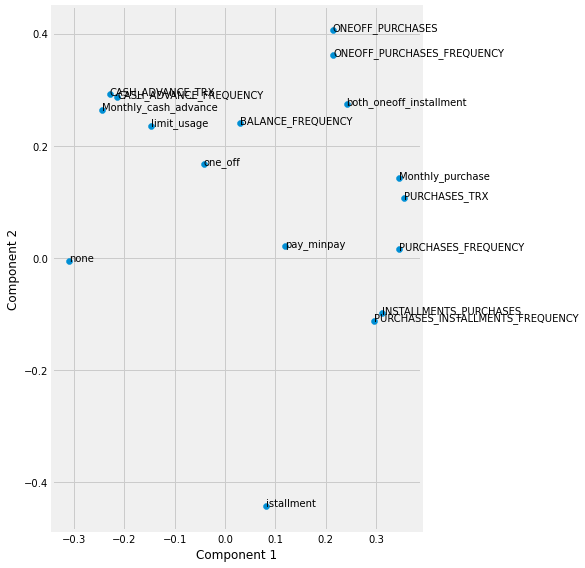

In [26]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.xlabel('Component 1')
plt.ylabel('Component 2')
for i, txt in enumerate(pca_df.Variable):
    plt.annotate(txt, (pca_df.PC1[i],pca_df.PC2[i]))
plt.tight_layout()
plt.show()

In [27]:
pca_model = IncrementalPCA(n_components=5)
X_pca = pca_model.fit_transform(X)
X_pca.shape

(8950, 5)

In [28]:
# transpose data từ 5 column thành 5 hàng
X_pca = np.transpose(X_pca)
X_pca

array([[-0.24303638, -3.97564766,  1.2878343 , ...,  1.15613613,
        -3.25022841,  0.2392264 ],
       [ 2.75941537, -0.14366797, -1.51616931, ...,  2.79633295,
         1.01130582, -2.23265271],
       [ 0.34527329, -0.53569917,  2.7233616 , ..., -0.5320671 ,
         0.47819191,  1.83156605],
       [-0.40876937,  1.03559114, -1.88289112, ..., -0.67602438,
         0.82718661, -1.12936238],
       [-0.00676501, -0.4216259 ,  0.01518656, ...,  0.32659158,
        -1.1205855 ,  1.7399784 ]])

In [29]:
pca_df1 = pd.DataFrame({'PC1':X_pca[0],'PC2':X_pca[1],'PC3':X_pca[2],'PC4':X_pca[3],'PC5':X_pca[4]})
print(pca_df1.shape)
pca_df1.head()

(8950, 5)


,PC1,PC2,PC3,PC4,PC5
0,-0.243036,2.759415,0.345273,-0.408769,-0.006765
1,-3.975648,-0.143668,-0.535699,1.035591,-0.421626
2,1.287834,-1.516169,2.723362,-1.882891,0.015187
3,-1.048064,-0.675997,2.484095,-1.325593,0.751237
4,-1.451844,0.183275,2.294527,-1.608468,-0.561840


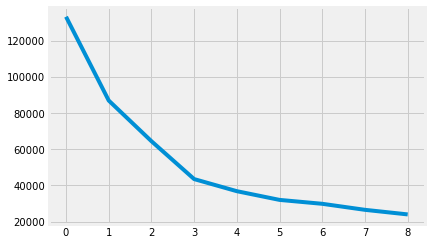

In [30]:
ssd = []
for num_clusters in list(range(1,10)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(pca_df1)
    ssd.append(model_clus.inertia_)

plt.plot(ssd)

In [31]:
# ở line chart này thì giá trị k = 4 ( 4 cluster) là phù hợp nhất với Clustering model
df_cluster = KMeans(n_clusters = 4, max_iter=50,random_state = 50)
df_cluster.fit(pca_df1)

KMeans(max_iter=50, n_clusters=4, random_state=50)

In [32]:
df1 = pca_df1
df1.index = pd.RangeIndex(len(df1.index))
df1_k_means = pd.concat([df1, pd.Series(df_cluster.labels_)], axis=1)
df1_k_means.columns = ['PC1', 'PC2','PC3','PC4','PC5','ClusterID']
df1_k_means

,PC1,PC2,PC3,PC4,PC5,ClusterID
0,-0.243036,2.759415,0.345273,-0.408769,-0.006765,2
1,-3.975648,-0.143668,-0.535699,1.035591,-0.421626,1
2,1.287834,-1.516169,2.723362,-1.882891,0.015187,3
3,-1.048064,-0.675997,2.484095,-1.325593,0.751237,3
4,-1.451844,0.183275,2.294527,-1.608468,-0.561840,3
...,...,...,...,...,...,...
8945,1.778963,2.621609,-0.718695,-0.049057,0.629893,2
8946,1.613706,2.655958,-0.924065,-0.929086,0.311879,2
8947,1.156136,2.796333,-0.532067,-0.676024,0.326592,2
8948,-3.250228,1.011306,0.478192,0.827187,-1.120585,1


<AxesSubplot:xlabel='PC1', ylabel='PC2'>

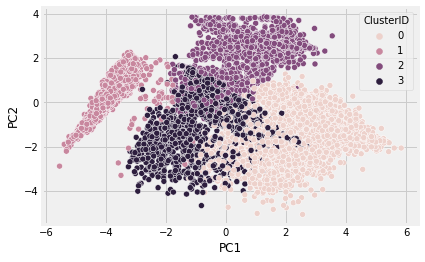

In [33]:
sns.scatterplot(x='PC1',y='PC2',hue='ClusterID',legend='full',data=df1_k_means)

In [34]:
df2 = pd.merge(df1_k_means, pca_df1, on = ['PC1','PC2','PC3','PC4','PC5'],how='inner')
df2['purchase_kind'] = df['purchase_kind']
df2['CUST_ID'] = data['CUST_ID']
df2.head()

,PC1,PC2,PC3,PC4,PC5,ClusterID,purchase_kind,CUST_ID
0,-0.243036,2.759415,0.345273,-0.408769,-0.006765,2,istallment,C10001
1,-3.975648,-0.143668,-0.535699,1.035591,-0.421626,1,none,C10002
2,1.287834,-1.516169,2.723362,-1.882891,0.015187,3,one_off,C10003
3,-1.048064,-0.675997,2.484095,-1.325593,0.751237,3,one_off,C10004
4,-1.451844,0.183275,2.294527,-1.608468,-0.561840,3,one_off,C10005


In [35]:
data_full_variable = pd.concat([df,pd.get_dummies(df['purchase_kind'])],axis=1)
data_full_variable['CUST_ID'] = data['CUST_ID']
data_full_variable.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,Monthly_purchase,Monthly_cash_advance,limit_usage,pay_minpay,purchase_kind,both_oneoff_installment,istallment,none,one_off,CUST_ID
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,...,7.950000,0.000000,0.040901,1.446508,istallment,0,1,0,0,C10001
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,...,0.000000,536.912124,0.457495,3.826241,none,0,0,1,0,C10002
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,...,64.430833,0.000000,0.332687,0.991682,one_off,0,0,0,1,C10003
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,...,124.916667,17.149001,0.222223,0.000000,one_off,0,0,0,1,C10004
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,...,1.333333,0.000000,0.681429,2.771075,one_off,0,0,0,1,C10005


In [36]:
# cần tạo bảng có đủ giá trị ban đầu (đã đưa về giá trị log), có CUST_ID và ClusterID
# các biến PC1, PC2, PC3, PC4, PC5 ko cần thiết đưa vào data nữa
big_data=pd.merge(data_full_variable, df2, on='CUST_ID', how='inner')
big_data=big_data.drop(['PC1','PC2','PC3','PC4','PC5'],axis=1)
big_data.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,limit_usage,pay_minpay,purchase_kind_x,both_oneoff_installment,istallment,none,one_off,CUST_ID,ClusterID,purchase_kind_y
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,...,0.040901,1.446508,istallment,0,1,0,0,C10001,2,istallment
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,...,0.457495,3.826241,none,0,0,1,0,C10002,1,none
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,...,0.332687,0.991682,one_off,0,0,0,1,C10003,3,one_off
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,...,0.222223,0.000000,one_off,0,0,0,1,C10004,3,one_off
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,...,0.681429,2.771075,one_off,0,0,0,1,C10005,3,one_off


In [37]:
big_data.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE', 'Monthly_purchase', 'Monthly_cash_advance', 'limit_usage',
       'pay_minpay', 'purchase_kind_x', 'both_oneoff_installment',
       'istallment', 'none', 'one_off', 'CUST_ID', 'ClusterID',
       'purchase_kind_y'],
      dtype='object')

In [38]:
cols = ['BALANCE', 'PURCHASES', 'PURCHASES_FREQUENCY', 'PURCHASES_TRX', 
        'CASH_ADVANCE_TRX', 'CREDIT_LIMIT', 'Monthly_purchase', 'Monthly_cash_advance',
        'limit_usage', 'pay_minpay', 'both_oneoff_installment', 'istallment', 'none', 'one_off',]
df_final=[]
for i in cols:
    cluster = big_data.groupby(["ClusterID"])[i].mean()
    df_final.append(cluster)
df_final = pd.concat(df_final, axis=1)
df_final

,BALANCE,PURCHASES,PURCHASES_FREQUENCY,PURCHASES_TRX,CASH_ADVANCE_TRX,CREDIT_LIMIT,Monthly_purchase,Monthly_cash_advance,limit_usage,pay_minpay,both_oneoff_installment,istallment,none,one_off
ClusterID,,,,,,,,,,,,,,
0,1811.244331,2280.612488,0.802265,33.135292,2.808125,5748.836753,193.759754,67.644533,0.354616,7.264788,1.000000,0.000000,0.000000,0.000000
1,2177.572394,1.859344,0.003758,0.045933,6.552632,4055.582137,0.159337,186.298043,0.576217,9.927979,0.002392,0.017225,0.977033,0.003349
2,798.267082,543.583589,0.703035,12.051144,1.018843,3338.238396,47.560400,33.474821,0.264156,13.404629,0.002243,0.997757,0.000000,0.000000
3,1429.021056,787.353671,0.321170,7.118997,2.864995,4512.905630,69.758276,77.843485,0.378727,5.561421,0.003735,0.000000,0.000000,0.996265


In [39]:
df_final.to_csv('kmeans.csv',index=True)